# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This data processing aims to reveal patterns in earthquake-related news on Detik.com by identifying the most frequently used words.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.detik.com/search/searchall?query=gempa')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<html lang="id-ID">\r\n\t<head>\r\n\t<link rel="preconnect" href="https://awscdn.detik.net.id"><link rel="preconnect" href="https://awscdn.detik.net.id" crossorigin><link rel="preconnect" href="https://cdn.detik.net.id"><link rel="preconnect" href="https://cdn.detik.net.id" crossorigin>\t<link rel="dns-prefetch" href="https://cdn.detik.net.id"/><link rel="dns-prefetch" href="https://akcdn.detik.net.id"/><link rel="dns-prefetch" href="https://cdnv.detik.net.id"/><link rel="dns-prefetch"'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

The following code is used to identify the correct HTML elements for scraping relevant information from the website. By using .prettify(), we can visualize the HTML structure in a more readable format to locate the key tags and classes.

- The following .find() method is applied to target the first tag with class 'list-content__item', which contains the news entry.

- The following .prettify() is used to print and examine the structure of the selected HTML so we can decide how to extract the title, summary, and link for each article.

This step is crucial as it allows us to verify the HTML layout and ensure that the correct elements are being selected for our scraping process.

In [4]:
table = soup.find('article', attrs={'class':'list-content__item'})
print(table.prettify()[1:3000])

article class="list-content__item">
 <div class="media media--right media--image-radius block-link">
  <div class="media__image">
   <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="7948117" dtr-idx="1" dtr-sec="search result relevansi" dtr-ttl="Turis-turis Panik Saat Gempa Terjang Turki dan Yunani" href="https://travel.detik.com/travel-news/d-7948117/turis-turis-panik-saat-gempa-terjang-turki-dan-yunani" onclick="_pt(this)">
    <span class="ratiobox ratiobox--4-3 lqd">
     <img alt="Turis-turis Panik Saat Gempa Terjang Turki dan Yunani" class="" src="https://akcdn.detik.net.id/visual/2025/04/24/gempa-m-62-guncang-istanbul-turki-1745461530390_43.jpeg?w=250&amp;q=90" title="Turis-turis Panik Saat Gempa Terjang Turki dan Yunani">
     </img>
    </span>
   </a>
  </div>
  <div class="media__text">
   <h2 class="media__subtitle">
    detikTravel
   </h2>
   <h3 class="media__title">
    <a class="media__link" dtr-act="artikel" dtr-evt="search result rel

Next, we need to find the row length.

In [5]:
earthquake = soup.find_all('article', attrs={'class':'list-content__item'})


In [6]:
earthquake

[<article class="list-content__item">
 <div class="media media--right media--image-radius block-link">
 <div class="media__image">
 <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="7948117" dtr-idx="1" dtr-sec="search result relevansi" dtr-ttl="Turis-turis Panik Saat Gempa Terjang Turki dan Yunani" href="https://travel.detik.com/travel-news/d-7948117/turis-turis-panik-saat-gempa-terjang-turki-dan-yunani" onclick="_pt(this)">
 <span class="ratiobox ratiobox--4-3 lqd">
 <img alt="Turis-turis Panik Saat Gempa Terjang Turki dan Yunani" class="" src="https://akcdn.detik.net.id/visual/2025/04/24/gempa-m-62-guncang-istanbul-turki-1745461530390_43.jpeg?w=250&amp;q=90" title="Turis-turis Panik Saat Gempa Terjang Turki dan Yunani"> </img></span>
 </a>
 </div>
 <div class="media__text">
 <h2 class="media__subtitle">
            detikTravel         </h2>
 <h3 class="media__title">
 <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="

In [7]:
row_length = len(earthquake)

In [8]:
row_length

12

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [9]:
print(soup.prettify()[:3000])


<!DOCTYPE html>
<html lang="id-ID">
 <head>
  <link href="https://awscdn.detik.net.id" rel="preconnect"/>
  <link crossorigin="" href="https://awscdn.detik.net.id" rel="preconnect"/>
  <link href="https://cdn.detik.net.id" rel="preconnect"/>
  <link crossorigin="" href="https://cdn.detik.net.id" rel="preconnect"/>
  <link href="https://cdn.detik.net.id" rel="dns-prefetch">
   <link href="https://akcdn.detik.net.id" rel="dns-prefetch">
    <link href="https://cdnv.detik.net.id" rel="dns-prefetch">
     <link href="https://connect.detik.com" rel="dns-prefetch">
      <link href="https://newrevive.detik.com" rel="dns-prefetch"/>
      <link href="https://cdnstatic.detik.com" rel="dns-prefetch"/>
      <link href="https://analytic.detik.com" rel="dns-prefetch"/>
      <link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
      <link href="https://securepubads.g.doubleclick.net" rel="dns-prefetch"/>
      <link href="https://pubads.g.doubleclick.net" rel="dns-prefetch"/>
      

In [10]:
temp = []  # Initiating a tuple

for i in range(0, 12):

    article = earthquake[i]

   # Judul
    title_tag = article.find('h3', class_='media__title')
    title_link = title_tag.find('a') if title_tag else None
    title = title_link.get_text(strip=True) if title_link else 'Judul tidak ditemukan'

    # Berita
    summary_tag = article.find('div', class_='media__desc')
    summary = summary_tag.get_text(strip=True) if summary_tag else 'Ringkasan tidak ditemukan'

    # Tanggal
    date_tag = article.find('div', class_='media__date')
    date_span = date_tag.find('span') if date_tag else None
    date = date_span.get_text(strip=True) if date_span else 'Tanggal tidak ditemukan'

    temp.append((title, summary, date))

In [11]:
temp = temp[::-1]


Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [12]:
print(temp[0])


('Gempa M 3,8 Guncang Seram Bagian Timur Maluku, Kedalaman 12 Km', 'Gempa magnitudo 3,8 mengguncang Kabupaten Seram Bagian Timur, Maluku, pada kedalaman 12 km. BMKG melaporkan gempa terjadi pukul 12.09 WIT.', 'Minggu, 01 Jun 2025 10:28 WIB')


In [13]:
import pandas as pd

gempa = pd.DataFrame(temp, columns= ('title', 'summary', 'date'))
gempa.head()

,title,summary,date
0,"Gempa M 3,8 Guncang Seram Bagian Timur Maluku,...","Gempa magnitudo 3,8 mengguncang Kabupaten Sera...","Minggu, 01 Jun 2025 10:28 WIB"
1,"Gempa Bumi M 5,8 Guncang Turki, 1 Orang Tewas-...","Gempa bumi berkekuatan Magnitudo 5,8 menggunca...","Selasa, 03 Jun 2025 12:27 WIB"
2,"KBRI: Tak Ada WNI Terdampak Gempa M 5,8 di Mug...","Gempa bumi M 5,8 mengguncang area Marmaris di ...","Selasa, 03 Jun 2025 18:16 WIB"
3,100 Narapidana Kabur dari Penjara Pakistan Saa...,Lebih dari 100 narapidana kabur dari sebuah pe...,"Selasa, 03 Jun 2025 16:22 WIB"
4,Puluhan Bangunan di Bengkulu Rusak Usai Digunc...,Ringkasan tidak ditemukan,"Jumat, 23 Mei 2025 17:00 WIB"


In [14]:
gempa

,title,summary,date
0,"Gempa M 3,8 Guncang Seram Bagian Timur Maluku,...","Gempa magnitudo 3,8 mengguncang Kabupaten Sera...","Minggu, 01 Jun 2025 10:28 WIB"
1,"Gempa Bumi M 5,8 Guncang Turki, 1 Orang Tewas-...","Gempa bumi berkekuatan Magnitudo 5,8 menggunca...","Selasa, 03 Jun 2025 12:27 WIB"
2,"KBRI: Tak Ada WNI Terdampak Gempa M 5,8 di Mug...","Gempa bumi M 5,8 mengguncang area Marmaris di ...","Selasa, 03 Jun 2025 18:16 WIB"
3,100 Narapidana Kabur dari Penjara Pakistan Saa...,Lebih dari 100 narapidana kabur dari sebuah pe...,"Selasa, 03 Jun 2025 16:22 WIB"
4,Puluhan Bangunan di Bengkulu Rusak Usai Digunc...,Ringkasan tidak ditemukan,"Jumat, 23 Mei 2025 17:00 WIB"
5,"Gempa Bumi Guncang Turki-Yunani, Satu Tewas da...","Gempa bumi berkekuatan 5,8 skala Richter mengg...","Selasa, 03 Jun 2025 16:47 WIB"
6,Video: 216 Tahanan Kabur dari Penjara di Pakis...,Sebanyak 216 tahanan melarikan diri dari penja...,12 jam yang lalu
7,"Gempa M 4,6 Terjadi di Agam, Terasa hingga Padang","Gempa dengan kekuatan M 4,6 terjadi di Kabupat...","Minggu, 01 Jun 2025 23:56 WIB"
8,"270 Kali Gempa, Wisata Tangkuban Perahu tetap ...",Ringkasan tidak ditemukan,1 jam yang lalu
9,"Gunung Tangkuban Parahu Terus Bergejolak, 270 ...",Aktivitas Gunung Tangkuban Parahu meningkat si...,7 jam yang lalu


### Data Cleansing

The following steps are necessary to correct data types and clean potential data errors. In this case, only the 'date' column requires conversion from an object to a datetime format.

- The following .dtypes check is used to identify the data type of each column in the gempa DataFrame.

- The following dictionary bulan_map is created to map Indonesian month names (e.g., "Januari", "Februari") to their English abbreviations. This mapping is required because Python’s datetime module does not recognize non-English month names by default.

- The following import from datetime provides the tools needed to parse and manipulate date strings into datetime objects.

This step is important to ensure all timestamps are in proper datetime format so that further temporal analysis (like filtering, sorting, or time-based grouping) can be performed accurately.

In [15]:
gempa.dtypes


title      object
summary    object
date       object
dtype: object

In [16]:
from datetime import datetime, timedelta


bulan_map = {
    'Januari': 'Jan',
    'Februari': 'Feb',
    'Maret': 'Mar',
    'April': 'Apr',
    'Mei': 'May',
    'Juni': 'Jun',
    'Juli': 'Jul',
    'Agustus': 'Aug',
    'September': 'Sep',
    'Oktober': 'Oct',
    'November': 'Nov',
    'Desember': 'Dec'
}

def convert_relative_date(text):
    now = datetime.now()
    if "jam yang lalu" in text:
        hours = int(text.split()[0])
        return (now - timedelta(hours=hours)).date()
    elif "menit yang lalu" in text:
        minutes = int(text.split()[0])
        return (now - timedelta(minutes=minutes)).date()
    else:
        return pd.NaT

def translate_bulan(text):
    for indo, eng in bulan_map.items():
        if indo in text:
            return text.replace(indo, eng)
    return text

def parse_date(text):
    if "yang lalu" in text:
        return convert_relative_date(text)
    if "WIB" in text:
        text = text.replace("WIB", "").strip()
        text = translate_bulan(text)
        parts = text.split(", ")
        if len(parts) == 2:
            try:
                # Ubah ke format hanya tanggal (tanpa jam)
                return pd.to_datetime(parts[1], format="%d %b %Y %H:%M").date()
            except:
                try:
                    # Kalau tidak ada jam
                    return pd.to_datetime(parts[1], format="%d %b %Y").date()
                except:
                    return pd.NaT
    return pd.NaT

gempa['date_parsed'] = gempa['date'].apply(parse_date)

print(gempa[['date', 'date_parsed']].head(20))




                             date date_parsed
0   Minggu, 01 Jun 2025 10:28 WIB  2025-06-01
1   Selasa, 03 Jun 2025 12:27 WIB  2025-06-03
2   Selasa, 03 Jun 2025 18:16 WIB  2025-06-03
3   Selasa, 03 Jun 2025 16:22 WIB  2025-06-03
4   Jumat, 23 Mei  2025 17:00 WIB  2025-05-23
5   Selasa, 03 Jun 2025 16:47 WIB  2025-06-03
6                12 jam yang lalu  2025-06-04
7   Minggu, 01 Jun 2025 23:56 WIB  2025-06-01
8                 1 jam yang lalu  2025-06-04
9                 7 jam yang lalu  2025-06-04
10                7 jam yang lalu  2025-06-04
11                5 jam yang lalu  2025-06-04


In [17]:
final_gempa= gempa[['title', 'summary', 'date_parsed']]

In [18]:
final_gempa.reset_index(drop=True, inplace=True)
final_gempa.index += 1
final_gempa.index.name = "No" 


In [19]:
final_gempa

,title,summary,date_parsed
No,,,
1,"Gempa M 3,8 Guncang Seram Bagian Timur Maluku,...","Gempa magnitudo 3,8 mengguncang Kabupaten Sera...",2025-06-01
2,"Gempa Bumi M 5,8 Guncang Turki, 1 Orang Tewas-...","Gempa bumi berkekuatan Magnitudo 5,8 menggunca...",2025-06-03
3,"KBRI: Tak Ada WNI Terdampak Gempa M 5,8 di Mug...","Gempa bumi M 5,8 mengguncang area Marmaris di ...",2025-06-03
4,100 Narapidana Kabur dari Penjara Pakistan Saa...,Lebih dari 100 narapidana kabur dari sebuah pe...,2025-06-03
5,Puluhan Bangunan di Bengkulu Rusak Usai Digunc...,Ringkasan tidak ditemukan,2025-05-23
6,"Gempa Bumi Guncang Turki-Yunani, Satu Tewas da...","Gempa bumi berkekuatan 5,8 skala Richter mengg...",2025-06-03
7,Video: 216 Tahanan Kabur dari Penjara di Pakis...,Sebanyak 216 tahanan melarikan diri dari penja...,2025-06-04
8,"Gempa M 4,6 Terjadi di Agam, Terasa hingga Padang","Gempa dengan kekuatan M 4,6 terjadi di Kabupat...",2025-06-01
9,"270 Kali Gempa, Wisata Tangkuban Perahu tetap ...",Ringkasan tidak ditemukan,2025-06-04


### Data Visualization

The following steps are used to visualize the word frequency pattern in earthquake-related news titles. In this case, a WordCloud is generated to highlight the most common words appearing in the 'title' column of the dataset.

- The following libraries are imported to support text processing and visualization: WordCloud, matplotlib.pyplot, Counter, and re.

- The following line is used to concatenate all news titles into a single text string using .str.cat().

- The following WordCloud function is applied to generate a visual representation of the most frequently used words.

This visualization helps to quickly capture the dominant themes or keywords that appear in earthquake news headlines.



In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
from collections import defaultdict, Counter

In [21]:
text = final_gempa['title'].str.cat(sep=' ')

In [22]:
WordCloud().generate(text)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

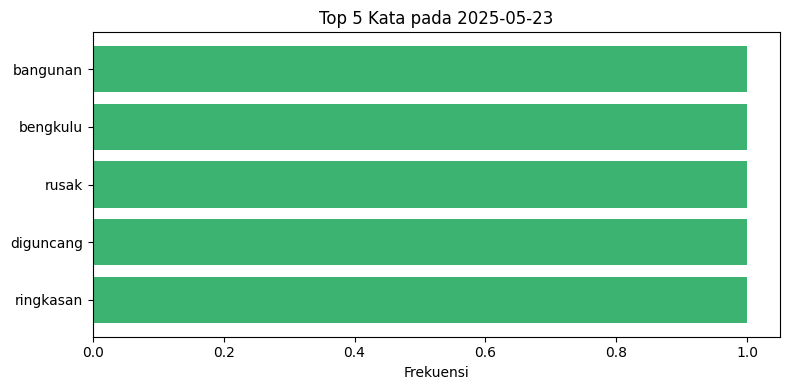

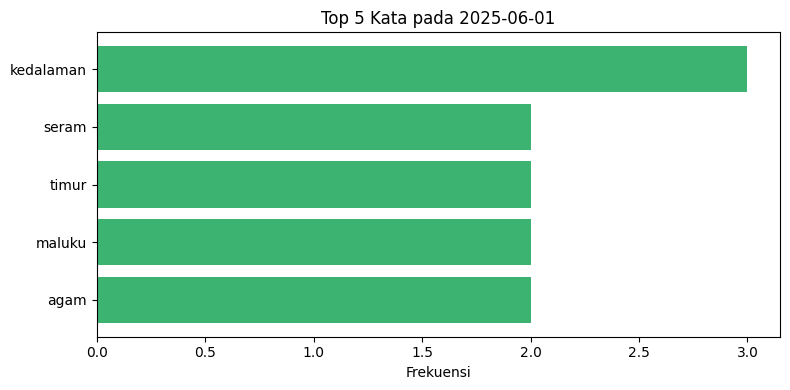

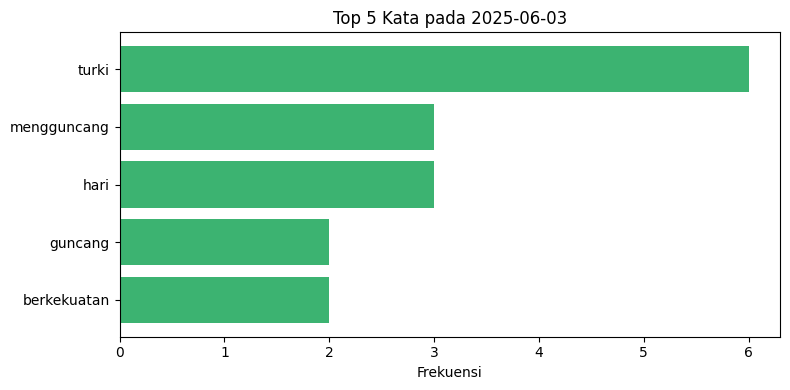

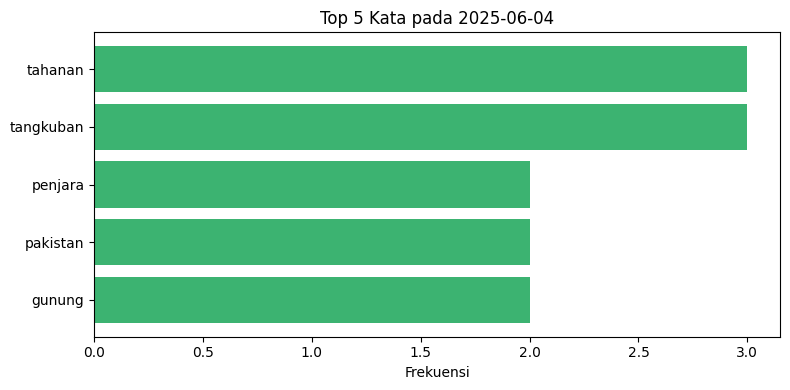

In [23]:
stopwords_id = {
    'm', 'terjadi', 'hingga', 'di', 'dan', 'dengan', 'dari', 'ke', 'yang', 'untuk',
    'pada', 'ada', 'tak', 'usai', 'saat', 'akibat', 'akan', 'tidak', 'itu', 'ini',
    'oleh', 'tersebut', 'dalam', 'bagi', 'karena', 'setelah', 'sebagai', 'wni',
    'video', 'dini', 'narapidana', 'lebih', 'kabur', 'km', 'skala', 'magnitudo',
    'update', 'korban', 'orang', 'warga', 'tewas', 'luka', 'besar', 'kondisi',
    'ratusan', 'puluhan', 'kabupaten', 'bagian', 'terasa', 'bernama', 'gempa', 'bumi', 'pukul', 'wib', 'dirasakan'
}


final_gempa['text'] = (final_gempa['title'].fillna('') + ' ' + final_gempa['summary'].fillna('')).str.lower()
final_gempa['date_parsed'] = pd.to_datetime(final_gempa['date_parsed'])


frekuensi_per_tanggal = defaultdict(Counter)

for _, row in final_gempa.iterrows():
    tanggal = row['date_parsed'].date()
    tokens = re.findall(r'\b[a-z]{2,}\b', row['text'])
    filtered = [word for word in tokens if word not in stopwords_id]
    frekuensi_per_tanggal[tanggal].update(filtered)


for tanggal in sorted(frekuensi_per_tanggal.keys()):
    top_words = frekuensi_per_tanggal[tanggal].most_common(5)
    if not top_words:
        continue
    
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(8, 4))
    plt.barh(words[::-1], counts[::-1], color='mediumseagreen')
    plt.title(f'Top 5 Kata pada {tanggal}')
    plt.xlabel('Frekuensi')
    plt.tight_layout()
    plt.show()

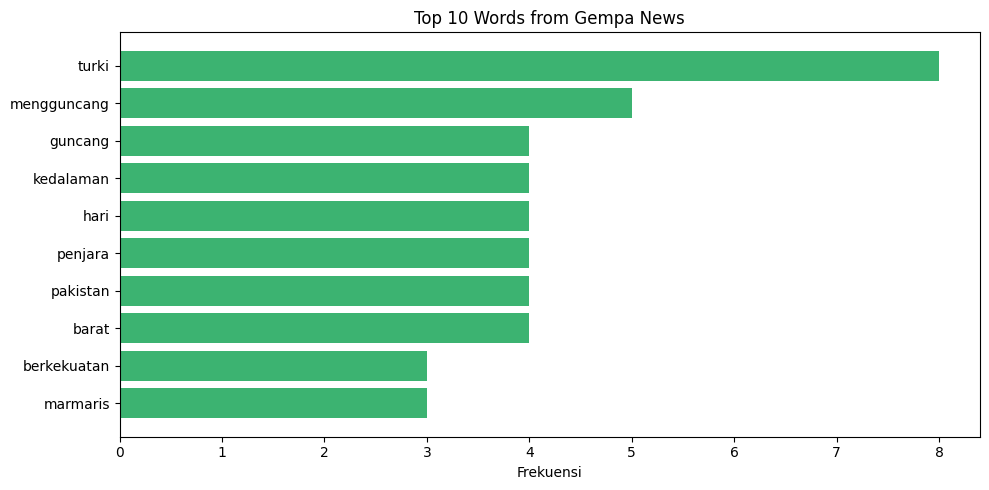

In [24]:

text = ' '.join(gempa['title'].fillna('') + ' ' + gempa['summary'].fillna('')).lower()
tokens = re.findall(r'\b[a-z]{2,}\b', text)
filtered_tokens = [word for word in tokens if word not in stopwords_id]

top_words = Counter(filtered_tokens).most_common(10)
words, freqs = zip(*top_words)

card_data = f"{', '.join([w for w, _ in top_words])}"

fig = plt.figure(figsize=(10, 5))
plt.barh(words[::-1], freqs[::-1], color='mediumseagreen')
plt.title("Top 10 Words from Gempa News")
plt.xlabel("Frekuensi")
plt.tight_layout()

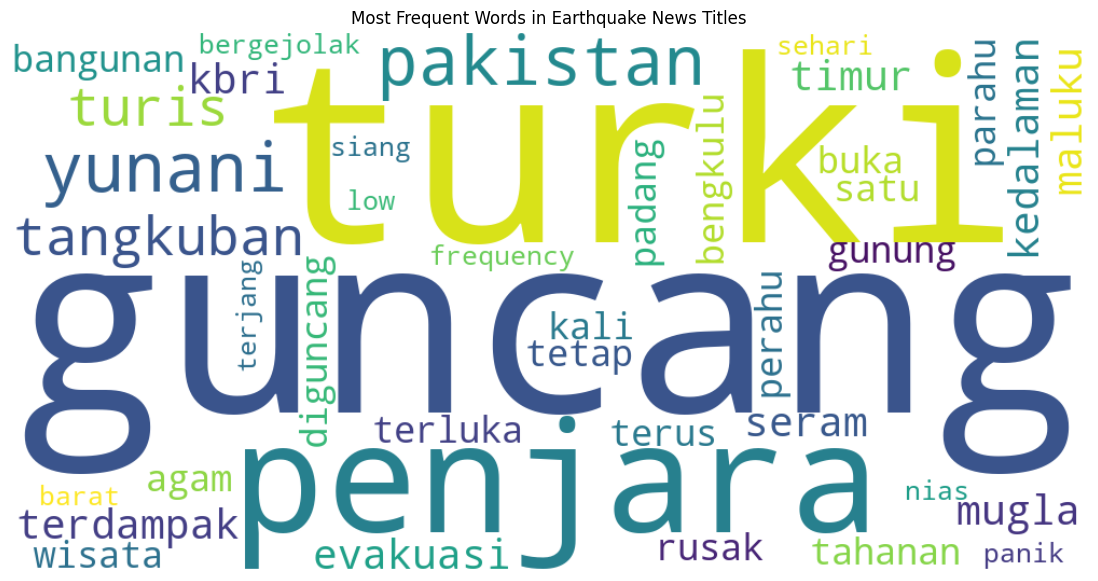

In [25]:
text = final_gempa['title'].dropna().str.cat(sep=' ').lower()

tokens = re.findall(r'\b[a-z]{2,}\b', text)
filtered_tokens = [word for word in tokens if word not in stopwords_id]
filtered_text = ' '.join(filtered_tokens)

# STEP 3: Generate WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(filtered_text)

# STEP 4: Show WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Earthquake News Titles')
plt.show()

## Analysis

As can be seen, ‘Turki’ is the most frequently mentioned word in the news (6 times), reflecting the recent earthquake event in the country covered by Detik. This is followed by words that describe the earthquake process, such as ‘guncang’ (shake), ‘kedalaman’ (depth), and ‘berkekuatan’ (magnitude/strength).

It appears that the location affected by the earthquake tends to be the most prominently mentioned term, as illustrated by the bar charts for each date. For example, the news highlights: ‘Bengkulu’ on 23 May, ‘Banyuasin’ on 28 May, ‘Seram’, ‘Maluku’, and ‘Agam’ on 1 June, ‘Turki’ on 3 June, and ‘Pakistan’ on 4 June.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.